In [2]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

from IPython.display import clear_output

In [3]:
# MSER = Maximally stable extremal region extractor
# create (int descriptor_type=AKAZE::DESCRIPTOR_MLDB, 
#         int descriptor_size=0, 
#         int descriptor_channels=3, 
#         float threshold=0.001f, 
#         int nOctaves=4, 
#         int nOctaveLayers=4, 
#         int diffusivity=KAZE::DIFF_PM_G2)


In [29]:
img = cv2.imread('chess.png') # Sudoku
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


delta:


A Jupyter Widget

Total MSER regions: 
71


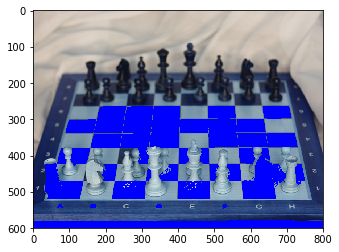

In [30]:
print('delta:')
wDelta = widgets.IntSlider(
    value=15,
    min=0,
    max=30,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(wDelta)


def paramsChanged(change):
    clear_output()

    print('delta:')
    display(wDelta)  
    
    image = cv2.imread('chess.png') # Sudoku
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    try:
        mser = cv2.MSER_create()
        mser.setDelta(wDelta.value)
        msers, bboxes = mser.detectRegions(gray)
        print("Total MSER regions: ")
        print(len(msers))
        for i in range(len(msers)):
            cv2.drawContours(image,msers,i,(0,0,255),1,8);
        plt.imshow(image)
        plt.show()
        
    except:
        clear_output()
        print('Invalid parametres. Try again')
        print('delta:')
        display(wDelta)
        

wDelta.observe(paramsChanged, names='value')